**[Introduction to Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**

---


## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [3]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *
print("\nSetup complete")

Validation MAE: 29,653

Setup complete


# Exercises
You could write the function `get_mae` yourself. For now, we'll supply it. This is the same function you read about in the previous lesson. Just run the cell below.

In [1]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes
Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.

Call the *get_mae* function on each value of max_leaf_nodes. Store the output in some way that allows you to select the value of `max_leaf_nodes` that gives the most accurate model on your data.

In [13]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
list_mae = []
for num_nodes in candidate_max_leaf_nodes:
    result = get_mae(num_nodes, train_X, val_X, train_y, val_y)
    list_mae.append(result)
#[debug]print(list_mae)
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[list_mae.index(min(list_mae))]

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [15]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Here is a short solution with a dict comprehension.
# The lesson gives an example of how to do this with an explicit loop.
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)

```

Bonus! (by Jihunni)

dataframe and plotting of Mean Average Error

[5, 25, 50, 100, 250, 500]
[35044.51299744237, 29016.41319191076, 27405.930473214907, 27282.50803885739, 27893.822225701646, 29454.18598068598]


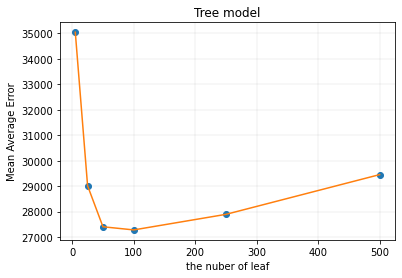

In [30]:
import matplotlib.pyplot as plt
    #from matplotlib.pyplot import plot 
#import seaborn as sns
    
#To check whether data is correct
#print(candidate_max_leaf_nodes)
#print(list_mae)

# Variables
a = candidate_max_leaf_nodes
b = list_mae

# Plot
plot(a, b ,'o')
plot(a, b, '-')
plt.xlabel('the nuber of leaf')
plt.ylabel('Mean Average Error')
plt.title('Tree model')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


In [21]:
help(plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [17]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# step_2.hint()
# step_2.solution()

You've tuned this model and improved your results. But we are still using Decision Tree models, which are not very sophisticated by modern machine learning standards. In the next step you will learn to use Random Forests to improve your models even more.

# Keep Going

You are ready for **[Random Forests](https://www.kaggle.com/dansbecker/random-forests).**


---
**[Introduction to Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*